#**Early Forest Fire Detection**

##D-Fire: an image dataset for fire and smoke detection
**Authors**: Researchers from Gaia, solutions on demand (GAIA)

###**About**
D-Fire is an image dataset of fire and smoke occurrences designed for machine learning and object detection algorithms with more than 21,000 images.

All images were annotated according to the YOLO format (normalized coordinates between 0 and 1). However, we provide the yolo2pixel function that converts coordinates in YOLO format to coordinates in pixels.

**Citation**

Pedro Vinícius Almeida Borges de Venâncio, Adriano Chaves Lisboa, Adriano Vilela Barbosa: An automatic fire detection system based on deep convolutional neural networks for low-power, resource-constrained devices. In: Neural Computing and Applications, 2022.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
#import dataset

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download the dataset
!gdown --id 19LSrZHYQqJSdKgH8Mtlgg7-i-L3eRhbh

# Extract the dataset
!unzip /content/D-Fire.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/WEB04443.txt  
  inflating: train/labels/WEB04444.txt  
  inflating: train/labels/WEB04445.txt  
  inflating: train/labels/WEB04446.txt  
  inflating: train/labels/WEB04447.txt  
  inflating: train/labels/WEB04448.txt  
  inflating: train/labels/WEB04449.txt  
  inflating: train/labels/WEB04450.txt  
  inflating: train/labels/WEB04451.txt  
  inflating: train/labels/WEB04452.txt  
  inflating: train/labels/WEB04453.txt  
  inflating: train/labels/WEB04454.txt  
  inflating: train/labels/WEB04455.txt  
  inflating: train/labels/WEB04456.txt  
  inflating: train/labels/WEB04457.txt  
  inflating: train/labels/WEB04458.txt  
  inflating: train/labels/WEB04459.txt  
  inflating: train/labels/WEB04460.txt  
  inflating: train/labels/WEB04461.txt  
  inflating: train/labels/WEB04462.txt  
  inflating: train/labels/WEB04463.txt  
  inflating: train/labels/WEB04464.txt  
  inflating: train/labels/WEB04465.txt  
  infl

In [3]:
#check /content/train and test data,/content/test

!ls /content/train
!ls /content/test


images	labels
images	labels


###**Loading and Preprocessing the Data**

In [4]:
# Directories
train_dir = '/content/train'
test_dir = '/content/test'

In [5]:
# YOLO to pixel conversion function
def yolo2pixel(bbox, img_width, img_height):
    x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = int(x_center - (width / 2))
    y_min = int(y_center - (height / 2))
    x_max = int(x_center + (width / 2))
    y_max = int(y_center + (height / 2))
    return [x_min, y_min, x_max, y_max]

In [6]:
# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    images_dir = os.path.join(data_dir, 'images')
    labels_dir = os.path.join(data_dir, 'labels')

    for img_name in os.listdir(images_dir):
        img_path = os.path.join(images_dir, img_name)
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt'))

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (224, 224))
        images.append(img)

        # Load label
        try:
            with open(label_path, 'r') as file:
                lines = file.readlines()
                if lines:
                    # Assuming single object detection per image
                    bbox = list(map(float, lines[0].strip().split()[1:]))
                    labels.append(1)  # Assuming label 1 for fire
                else:
                    labels.append(0)  # Assuming label 0 for non-fire
        except Exception as e:
            print(f"Error reading label file '{label_path}': {e}")
            continue

    return np.array(images), np.array(labels)

In [7]:
# Load train and test data
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

In [8]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

###**Visualizing the Dataset**

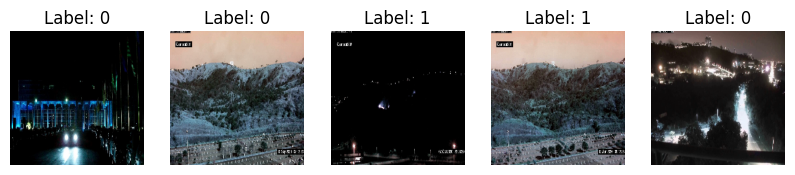

In [9]:
def visualize_data(X, y, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[idx])
        plt.title(f'Label: {y[idx]}')
        plt.axis('off')
    plt.show()

# Visualize some training samples
visualize_data(X_train, y_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


###**Model** **Development**

In [10]:
#Defining the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [12]:
#Training the Model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/15
431/431 [==============================] - 228s 529ms/step - loss: 0.0566 - accuracy: 0.9841 - val_loss: 0.4583 - val_accuracy: 0.8813
Epoch 2/15
431/431 [==============================] - 229s 530ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.5033 - val_accuracy: 0.8662
Epoch 3/15
431/431 [==============================] - 226s 525ms/step - loss: 0.0452 - accuracy: 0.9872 - val_loss: 0.4714 - val_accuracy: 0.8906
Epoch 4/15
431/431 [==============================] - 227s 526ms/step - loss: 0.0434 - accuracy: 0.9887 - val_loss: 0.4898 - val_accuracy: 0.8851
Epoch 5/15
431/431 [==============================] - 228s 530ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.5521 - val_accuracy: 0.8877
Epoch 6/15
431/431 [==============================] - 228s 529ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.5944 - val_accuracy: 0.8868
Epoch 7/15
431/431 [==============================] - 227s 527ms/step - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.5815 -

###**Evaluating the Model's Performance**

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

135/135 [==============================] - 12s 86ms/step - loss: 0.8313 - accuracy: 0.8820
Test accuracy: 0.88


###**Visualizing the Training Process**

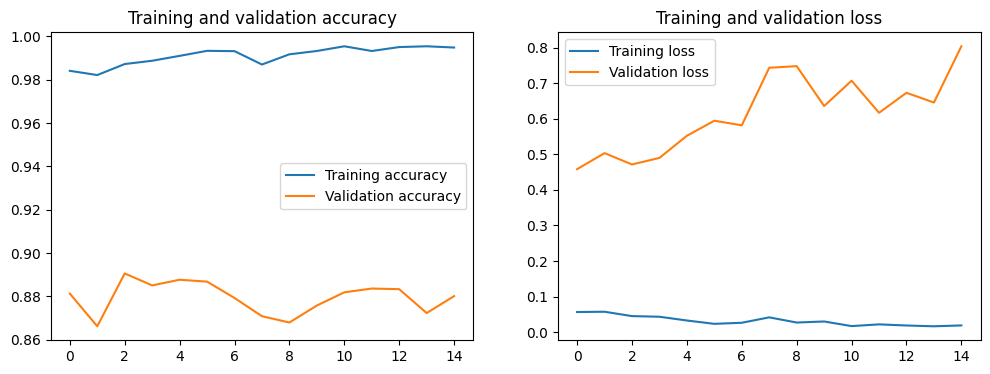

In [14]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)


135/135 [==============================] - 12s 89ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2005
           1       0.87      0.92      0.89      2301

    accuracy                           0.88      4306
   macro avg       0.88      0.88      0.88      4306
weighted avg       0.88      0.88      0.88      4306



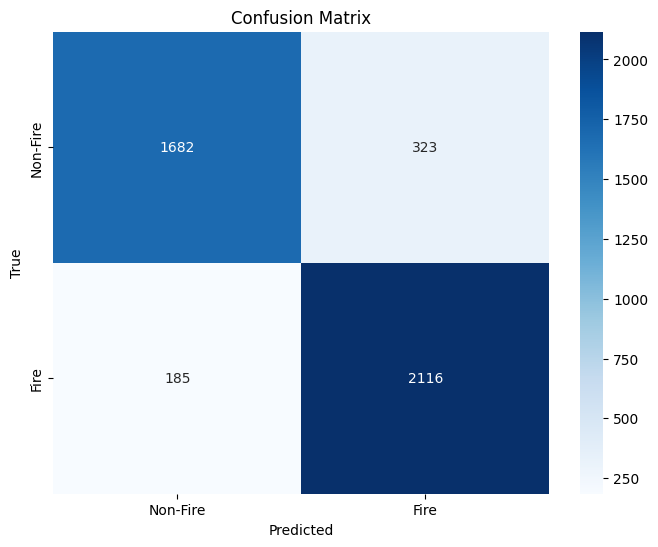

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Save the entire model to a HDF5 file
model.save('forest_fire_detection_model.h5')
print("Model saved successfully!")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


###**Make Predictions with the Model**

Shape of example images: (2, 224, 224, 3)
1/1 [==============================] - 0s 35ms/step
Prediction for fire 1.jpeg: Fire
Prediction for fire 2.jpg: Non-Fire


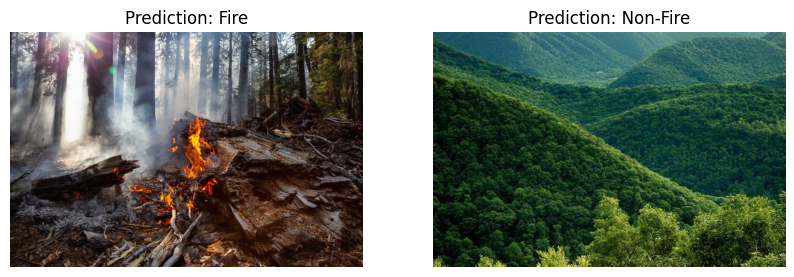

In [17]:
from tensorflow.keras.models import load_model

# Define paths to the example images
example_images = ['/content/fire 1.jpeg', '/content/fire 2.jpg']

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

# Load and preprocess example images
example_imgs = np.array([preprocess_image(img_path) for img_path in example_images])

# Check the shape of the preprocessed example images
print(f"Shape of example images: {example_imgs.shape}")

# Assuming you have already trained and saved your model
# Load the trained model
# model = load_model('path_to_your_trained_model.h5')

# Predict the labels for the example images
example_predictions = (model.predict(example_imgs) > 0.5).astype("int32")

# Print predictions
for i, img_path in enumerate(example_images):
    label = 'Fire' if example_predictions[i] == 1 else 'Non-Fire'
    print(f"Prediction for {os.path.basename(img_path)}: {label}")

# Visualize the example images with predictions
def visualize_predictions(img_paths, predictions):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(f'Prediction: {"Fire" if predictions[i] == 1 else "Non-Fire"}')
        plt.axis('off')
    plt.show()

# Visualize the example images with their predictions
visualize_predictions(example_images, example_predictions)